# Premier modèle IA

## Regression linéaire simple

### Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

### Chargement des données

In [2]:
data = pd.read_csv("./Data_Reg/reg_simple.csv")
data.head() # affichage des 5 premières lignes du dataframe data

,heure_rev,note
0,2,10
1,3,12
2,4,20
3,5,22
4,6,21


In [3]:
len(data)

27

### Visualisation des données

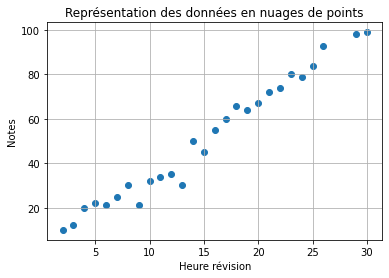

In [4]:
plt.scatter(data["heure_rev"], data["note"]) # Représentation en nuage de points
plt.title("Représentation des données en nuages de points") # Titre
plt.xlabel("Heure révision") # X label
plt.ylabel("Notes") # Y label
plt.grid(True) # Activation de la grille
plt.show()

###  Création du modèle

In [5]:
# Création de la matrice X
x = np.array(data["heure_rev"]) # Récupération des données x
m = len(x)
x_1 = np.ones(m) # Création de la colonne 1
X = np.column_stack((x,x_1)) # Concatenation de x et x_1 en colonne
X.shape

(27, 2)

In [6]:
# Création de théta
theta = np.random.randn(2,1)
theta.shape

(2, 1)

In [7]:
# Création de la fonction modélisant le modèle linéaire F
def model(X, theta):
    return X.dot(theta)

In [8]:
F = model(X, theta)
F.shape

(27, 1)

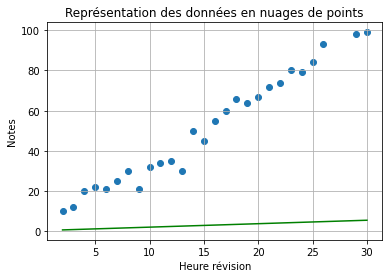

In [9]:
plt.scatter(data["heure_rev"], data["note"]) # Représentation en nuage de points
plt.plot(x, F, 'g')
plt.title("Représentation des données en nuages de points") # Titre
plt.xlabel("Heure révision") # X label
plt.ylabel("Notes") # Y label
plt.grid(True) # Activation de la grille
plt.show()

### Création de la fonction de coup

In [10]:
# Récupétation de la target
y = np.array(data["note"]).reshape((m,1))
y.shape

(27, 1)

In [11]:
def fonction_cout(X, Y, theta):
    m = len(X)
    return (1/(2*m))* np.sum(np.power((model(X, theta) - Y), 2))

In [12]:
J = fonction_cout(X, y, theta)
J

1487.5902725641508

### Création de la fonction gradient 

In [13]:
def gradient(X, Y, theta):
    m = len(X)
    return (1/m) * np.transpose(X).dot((model(X, theta) - Y))

### Création de la fonction déscente de gradient

In [14]:
def descente_gradient(X, Y, theta, alpha=1e-3, n_iterations=30):
    F = model(X, theta)
    F_plot = F # Variable pour la réprésentation graphique de l'évolution du modèle
    J = fonction_cout(X, Y, theta)
    dJ = gradient(X, Y, theta)
    
    for i in range(1,n_iterations):
        theta = theta - alpha*dJ
        F = model(X, theta)
        F_plot = np.append(F_plot, F, axis=1)# Sauvegarde de tout les modèles pour représentation graphique
        J = np.append(J, fonction_cout(X, Y, theta))   
        dJ = gradient(X, Y, theta)
    
    return J, F, F_plot

In [15]:
J, F, F_plot = descente_gradient(X, y, theta)
F.shape

### Evaluation du modèle par le coefficient de détermination

In [20]:
R2 =  1 - np.sum(np.power(y - F, 2)) / np.sum(np.power(y - np.mean(y), 2)) 
print(R2)

0.9733145361204169


### Représentation de la fonction de cout

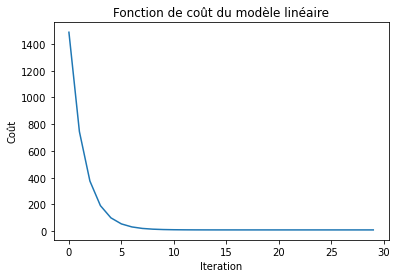

In [16]:
plt.plot(J)
plt.title("Fonction de coût du modèle linéaire")
plt.xlabel("Iteration")
plt.ylabel("Coût")
plt.show()

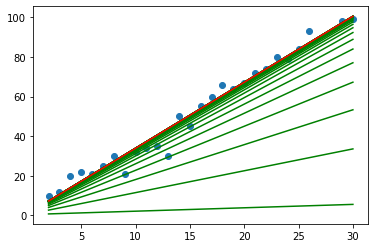

In [18]:
plt.scatter(data["heure_rev"], data["note"]) # Représentation en nuage de points
for i in range(len(F_plot)):
    plt.plot(x, F_plot[:,i], 'g')
plt.plot(x, F_plot[:,-1], 'r')
plt.show()

## Régression linéaire multiple

In [23]:
data_bhp = pd.read_csv("./Data_Reg/boston_house_prices.csv")
data_bhp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
data_bhp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
y = np.array(data_bhp["MEDV"]).reshape(len(data_bhp), 1)
y.shape

(506, 1)

In [69]:
x = np.array(data_bhp.iloc[:,:-1])
x.shape

(506, 13)

### Centrage et réduction des variables

In [62]:
# Moyenne des variables
mu = np.repeat(np.mean(x, axis=0).reshape(1, x.shape[1]) , len(x), axis=0)
mu.shape

(506, 13)

In [63]:
# std des variables
sigma = np.repeat(np.std(x, axis=0).reshape(1, x.shape[1]) , len(x), axis=0)
sigma.shape

(506, 13)

In [72]:
print(x[0,:])
print(mu[0,:])
print(sigma[0,:])

[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00]
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]
[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


In [74]:
x1 = (x - mu) / sigma

[-0.41978194  0.28482986 -1.2879095  -0.27259857 -0.14421743  0.41367189
 -0.12001342  0.1402136  -0.98284286 -0.66660821 -1.45900038  0.44105193
 -1.0755623 ]


In [79]:
X = np.column_stack((x1, np.ones(len(x))))
X.shape

(506, 14)

In [80]:
theta = np.random.randn(X.shape[1], 1)
theta.shape

(14, 1)

In [88]:
test = X.transpose().dot(X)  # X'.X
test.shape

(14, 14)

In [90]:
test1 = np.linalg.inv(test) # (X'.X)^-1

In [94]:
test2 = X.transpose().dot(y)
test2.shape

(14, 1)

In [97]:
Beta = test1.dot(test2)
print(Beta)

[[-9.28146064e-01]
 [ 1.08156863e+00]
 [ 1.40899997e-01]
 [ 6.81739725e-01]
 [-2.05671827e+00]
 [ 2.67423017e+00]
 [ 1.94660717e-02]
 [-3.10404426e+00]
 [ 2.66221764e+00]
 [-2.07678168e+00]
 [-2.06060666e+00]
 [ 8.49268418e-01]
 [-3.74362713e+00]
 [ 2.25328063e+01]]


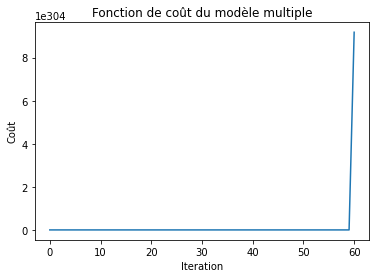

In [39]:
plt.plot(J)
plt.title("Fonction de coût du modèle multiple")
plt.xlabel("Iteration")
plt.ylabel("Coût")
plt.show()